In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("wi-covid.csv")
df.head()

,NAME,DATE,POS_7DAYAVG,DTH_NEW,DTH_NEW_2WK
0,Adams,2020-03-16,0.0,0.0,0.0
1,Ashland,2020-03-16,0.0,0.0,0.0
2,Barron,2020-03-16,0.0,0.0,0.0
3,Bayfield,2020-03-16,0.0,0.0,0.0
4,Brown,2020-03-16,0.0,0.0,0.0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, permutation_test_score
from sklearn.metrics import r2_score, mean_absolute_error

In [55]:
train_df, test_df = train_test_split(df, test_size=0.1)
lr = LinearRegression()
lr.fit(train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"])
lr.score(test_df[["POS_7DAYAVG"]], test_df["DTH_NEW_2WK"])

0.2277323069456213

# Metrics

In [23]:
r2_score(test_df["DTH_NEW_2WK"], lr.predict(test_df[["POS_7DAYAVG"]]))

0.2032342612591821

In [31]:
y = test_df["DTH_NEW_2WK"]
total = ((y - y.mean()) ** 2).sum()
total

5168.9191321499

In [28]:
leftover = ((y - lr.predict(test_df[["POS_7DAYAVG"]])) ** 2).sum()
leftover

4118.4176708189625

In [33]:
1 - leftover / total

0.2032342612591821

In [40]:
(y - lr.predict(test_df[["POS_7DAYAVG"]])).abs().mean()

0.375061586210973

In [37]:
mean_absolute_error(test_df["DTH_NEW_2WK"], lr.predict(test_df[["POS_7DAYAVG"]]))

0.375061586210973

# Permutation Testing

In [42]:
score, garbage_scores, pvalue = permutation_test_score(lr, test_df[["POS_7DAYAVG"]], test_df["DTH_NEW_2WK"])
score

0.09547680540377945

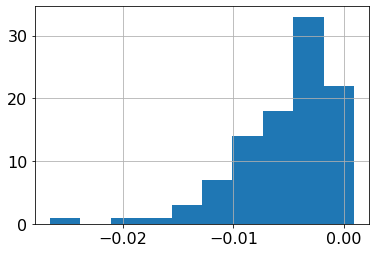

In [44]:
pd.Series(garbage_scores).hist()

In [45]:
pvalue

0.009900990099009901

# Cross Validation

In [56]:
scores = cross_val_score(lr, train_df[["POS_7DAYAVG"]], train_df["DTH_NEW_2WK"], cv=10)
scores.mean()

0.21680255769376586

In [57]:
scores.var()

0.006413852153815262